In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [143]:
df = pd.read_csv('faculdade.csv', delimiter=';')

In [145]:
# Exibir as primeiras linhas do DataFrame
print(df.head())

# Verificar a estrutura dos dados
print(df.info())

# Exibir estatísticas básicas do DataFrame
print(df.describe())


  faculdade sexo  idade estado_civil  filhos altura  peso transporte  \
0         A    F     25       casado       1   1,78    85       moto   
1         C    F     26   divorciado       2   1,68    64  bibicleta   
2         C    M     28        outro       0   1,68    58  bibicleta   
3         B    F     27   divorciado       3   1,64    77      outro   
4         A    M     17        outro       0   1,50    88      outro   

   exercicio  salario   localidade  
0         10        4   zona rural  
1          6        5  zona urbana  
2          3        2   zona rural  
3          6        4  zona urbana  
4         10        5   zona rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   faculdade     100 non-null    object
 1   sexo          100 non-null    object
 2   idade         100 non-null    int64 
 3   estado_civil  100 non-null

In [147]:
# Corrigir a coluna de altura (substituir vírgula por ponto)
df['altura'] = df['altura'].str.replace(',', '.').astype(float)


# Corrigir erro ortográfico em 'transporte' (substituir 'bibicleta' por 'bicicleta')
df['transporte'] = df['transporte'].replace('bibicleta', 'bicicleta')

# Verificar valores únicos da coluna 'transporte' após a correção
print("\nValores únicos em 'transporte':", df['transporte'].unique())


Valores únicos em 'transporte': ['moto' 'bicicleta' 'outro' 'onibus']


1- Classifique as variáveis do arquivo faculdade em Qualitativas (Nominal e Ordinal) e
quantitativas (Discreta e Contínuas)

In [150]:
# Classificação das variáveis
qualitativas_nominal = ['faculdade', 'sexo', 'estado_civil', 'transporte', 'localidade']
qualitativas_ordinal = []  # Não foi identificado nenhum dado ordinal no arquivo
quantitativas_discreta = ['filhos', 'salario', 'exercicio', 'idade']
quantitativas_continua = ['altura', 'peso']

print("Variáveis Qualitativas Nominal:", qualitativas_nominal)
print("Variáveis Qualitativas Ordinal:", qualitativas_ordinal)
print("Variáveis Quantitativas Discreta:", quantitativas_discreta)
print("Variáveis Quantitativas Contínua:", quantitativas_continua)


Variáveis Qualitativas Nominal: ['faculdade', 'sexo', 'estado_civil', 'transporte', 'localidade']
Variáveis Qualitativas Ordinal: []
Variáveis Quantitativas Discreta: ['filhos', 'salario', 'exercicio', 'idade']
Variáveis Quantitativas Contínua: ['altura', 'peso']


2- Agrupe as variáveis qualitativas por: faculdade, sexo, estado civil, transporte,
localidade.

In [153]:
# Agrupar variáveis qualitativas por faculdade, sexo, estado civil, transporte, localidade
agrupamento_qualitativas = df.groupby(['faculdade', 'sexo', 'estado_civil', 'transporte', 'localidade']).size()
print("\nAgrupamento por faculdade, sexo, estado civil, transporte, localidade:")
print(agrupamento_qualitativas)



Agrupamento por faculdade, sexo, estado civil, transporte, localidade:
faculdade  sexo  estado_civil  transporte  localidade 
A          F     casado        bicicleta   zona urbana    1
                               moto        zona rural     1
                               onibus      zona rural     1
                 divorciado    bicicleta   zona urbana    1
                               moto        zona urbana    2
                                                         ..
C          M     outro         moto        zona rural     1
                               onibus      zona rural     1
                               outro       zona rural     3
                                           zona urbana    2
                 solteiro      onibus      zona rural     2
Length: 76, dtype: int64


3- Agrupe as variáveis por: faculdade e sexo, faculdade e estado civil, faculdade e
transporte, faculdade e localidade.

In [156]:
# Agrupamentos combinados
agrupamento_faculdade_sexo = df.groupby(['faculdade', 'sexo']).size()
agrupamento_faculdade_estado_civil = df.groupby(['faculdade', 'estado_civil']).size()
agrupamento_faculdade_transporte = df.groupby(['faculdade', 'transporte']).size()
agrupamento_faculdade_localidade = df.groupby(['faculdade', 'localidade']).size()

print("\nAgrupamento por faculdade e sexo:")
print(agrupamento_faculdade_sexo)

print("\nAgrupamento por faculdade e estado civil:")
print(agrupamento_faculdade_estado_civil)

print("\nAgrupamento por faculdade e transporte:")
print(agrupamento_faculdade_transporte)

print("\nAgrupamento por faculdade e localidade:")
print(agrupamento_faculdade_localidade)



Agrupamento por faculdade e sexo:
faculdade  sexo
A          F       12
           M       18
B          F       14
           M       15
C          F       17
           M       24
dtype: int64

Agrupamento por faculdade e estado civil:
faculdade  estado_civil
A          casado          11
           divorciado       4
           outro            7
           solteiro         8
B          casado          10
           divorciado       7
           outro            7
           solteiro         5
C          casado          10
           divorciado       8
           outro           15
           solteiro         8
dtype: int64

Agrupamento por faculdade e transporte:
faculdade  transporte
A          bicicleta     10
           moto           7
           onibus         6
           outro          7
B          bicicleta      8
           moto           7
           onibus         8
           outro          6
C          bicicleta     13
           moto          10
           onibus    

4- Calcule as medidas de tendência central, separatrizes, variabilidade, assimetria e
curtose das variáveis (altura, peso, salário, idade)

In [159]:
# Função para calcular medidas descritivas, separatrizes, assimetria e curtose
def calcular_medidas(df, col):
    medidas = {
        'Média': df[col].mean(),
        'Mediana': df[col].median(),
        'Moda': df[col].mode()[0] if not df[col].mode().empty else None,
        'Variância': df[col].var(),
        'Desvio Padrão': df[col].std(),
        'Assimetria': df[col].skew(),
        'Curtose': df[col].kurt(),
        'Coeficiente de Variação': (df[col].std() / df[col].mean()) * 100,
        'Q1 (25%)': df[col].quantile(0.25),
        'Q2 (50%)': df[col].quantile(0.50),
        'Q3 (75%)': df[col].quantile(0.75)
    }
    return medidas

# Calcular para altura, peso, salário e idade
for col in ['altura', 'peso', 'salario', 'idade']:
    print(f"\nMedidas descritivas para {col}:")
    medidas = calcular_medidas(df, col)
    for medida, valor in medidas.items():
        print(f"{medida}: {valor}")



Medidas descritivas para altura:
Média: 1.6743000000000001
Mediana: 1.68
Moda: 1.68
Variância: 0.01232980808080808
Desvio Padrão: 0.111039668951272
Assimetria: -0.052558574645296
Curtose: -0.2026994154079258
Coeficiente de Variação: 6.632005551649764
Q1 (25%): 1.6
Q2 (50%): 1.68
Q3 (75%): 1.74

Medidas descritivas para peso:
Média: 68.65
Mediana: 70.0
Moda: 48
Variância: 155.54292929292924
Desvio Padrão: 12.47168510238008
Assimetria: -0.1735321038621488
Curtose: -1.0777229263597152
Coeficiente de Variação: 18.167057687370836
Q1 (25%): 58.75
Q2 (50%): 70.0
Q3 (75%): 79.0

Medidas descritivas para salario:
Média: 2.85
Mediana: 3.0
Moda: 1
Variância: 2.108585858585859
Desvio Padrão: 1.4520970554979646
Assimetria: 0.14567628978355468
Curtose: -1.3726860236422957
Coeficiente de Variação: 50.95077387712157
Q1 (25%): 2.0
Q2 (50%): 3.0
Q3 (75%): 4.0

Medidas descritivas para idade:
Média: 27.12
Mediana: 27.0
Moda: 35
Variância: 27.96525252525253
Desvio Padrão: 5.288218275114269
Assimetria: -0

5- Calcule o índice de massa corporal agrupando por faculdade e sexo e compare os
resultados utilizando as medidas descritivas (média, mediana, moda, variância, desvio
padrão, assimetria, curtose e coeficiente de variação)

In [162]:
# Calcular IMC (Índice de Massa Corporal)
df['IMC'] = df['peso'] / (df['altura'] ** 2)

# Agrupar por faculdade e sexo e calcular IMC
agrupamento_imc = df.groupby(['faculdade', 'sexo'])['IMC'].mean()

print("\nIMC médio por faculdade e sexo:")
print(agrupamento_imc)

# Medidas descritivas do IMC
for (faculdade, sexo), grupo in df.groupby(['faculdade', 'sexo']):
    print(f"\nMedidas descritivas do IMC para {faculdade} - {sexo}:")
    medidas = calcular_medidas(grupo, 'IMC')
    for medida, valor in medidas.items():
        print(f"{medida}: {valor}")



IMC médio por faculdade e sexo:
faculdade  sexo
A          F       24.388053
           M       27.851178
B          F       23.692518
           M       22.460417
C          F       25.116127
           M       24.356342
Name: IMC, dtype: float64

Medidas descritivas do IMC para A - F:
Média: 24.388053306320078
Mediana: 25.273076807433853
Moda: 12.868540707483769
Variância: 48.47464439660471
Desvio Padrão: 6.962373474369549
Assimetria: 0.11209908156091698
Curtose: -0.003588612567630989
Coeficiente de Variação: 28.548295294094977
Q1 (25%): 19.973677286244108
Q2 (50%): 25.273076807433853
Q3 (75%): 27.73152536723959

Medidas descritivas do IMC para A - M:
Média: 27.85117795316888
Mediana: 26.399456323698747
Moda: 18.699780861943022
Variância: 37.980933275840414
Desvio Padrão: 6.16286729338223
Assimetria: 0.13274266035787805
Curtose: -1.1611459314104366
Coeficiente de Variação: 22.127851481703757
Q1 (25%): 23.167914906645432
Q2 (50%): 26.399456323698747
Q3 (75%): 33.12293768886144

Medid

6- Repita as tabelas agrupadas anteriores com cores.

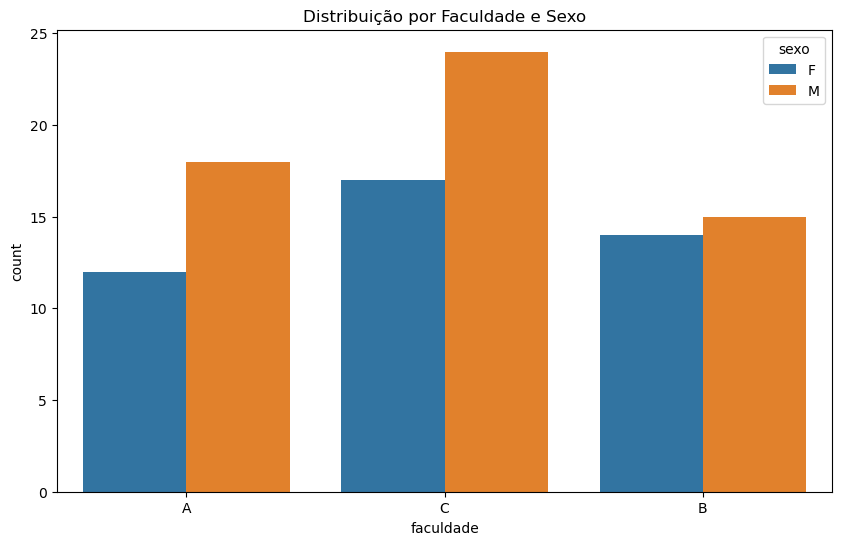

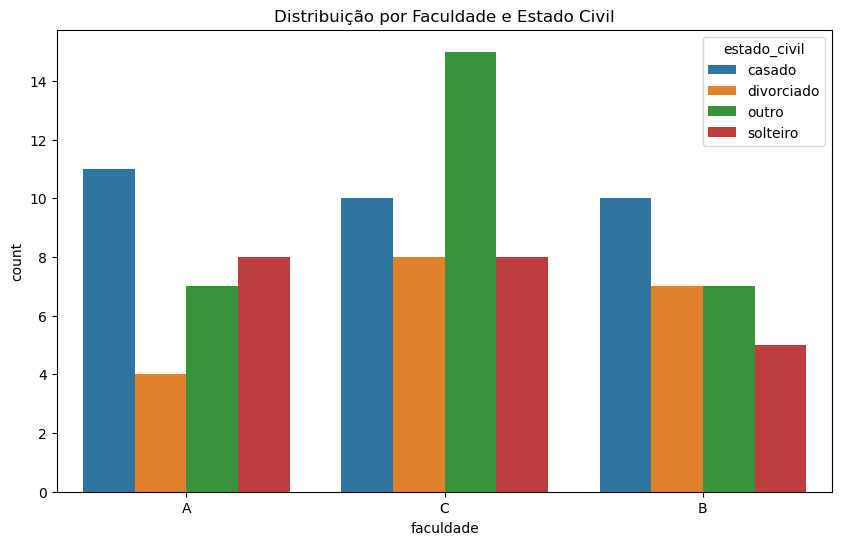

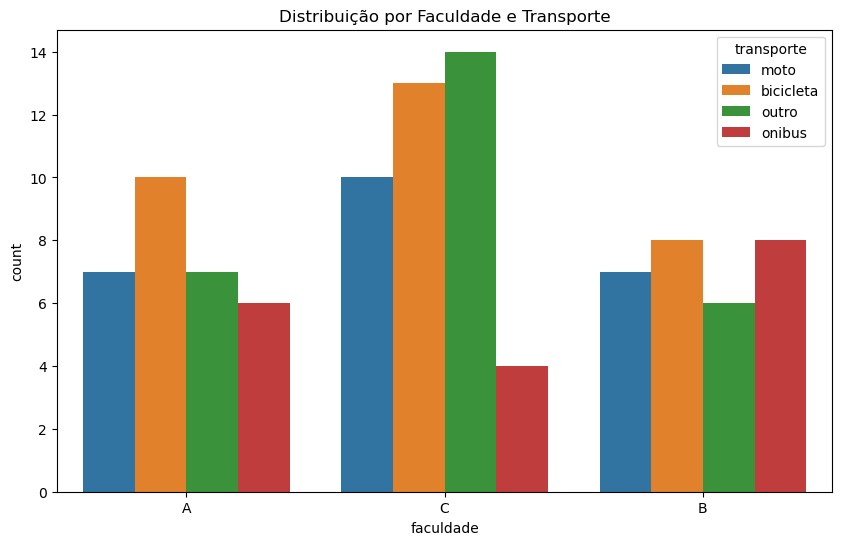

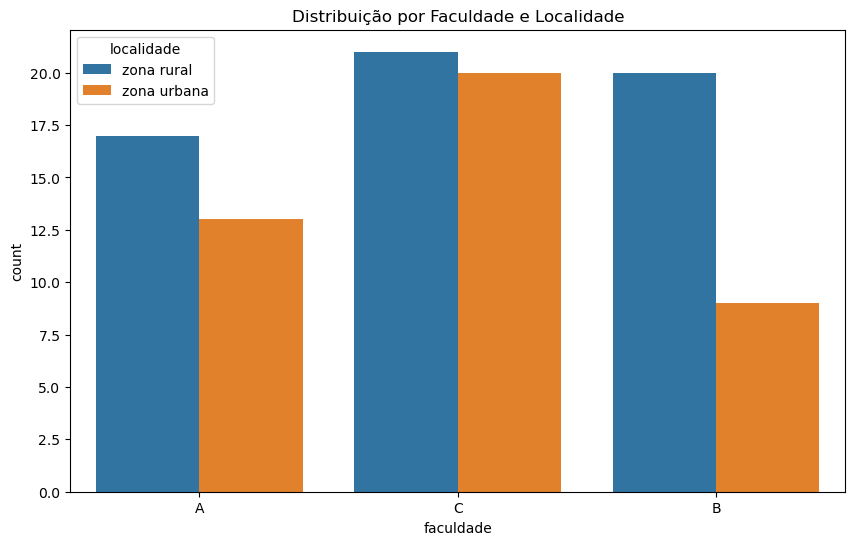

In [165]:
import seaborn as sns

# Gráfico de barras colorido para agrupamento de faculdade e sexo
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='faculdade', hue='sexo')
plt.title('Distribuição por Faculdade e Sexo')
plt.show()

# Gráfico de barras colorido para agrupamento de faculdade e estado civil
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='faculdade', hue='estado_civil')
plt.title('Distribuição por Faculdade e Estado Civil')
plt.show()

# Gráfico de barras colorido para agrupamento de faculdade e transporte
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='faculdade', hue='transporte')
plt.title('Distribuição por Faculdade e Transporte')
plt.show()

# Gráfico de barras colorido para agrupamento de faculdade e localidade
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='faculdade', hue='localidade')
plt.title('Distribuição por Faculdade e Localidade')
plt.show()


7- Faça os gráficos de barras para as variáveis (sexo, estado civil, filhos, transporte,
localidade) separado por faculdade (A, B e C)


Gráficos de barras para Faculdade A:


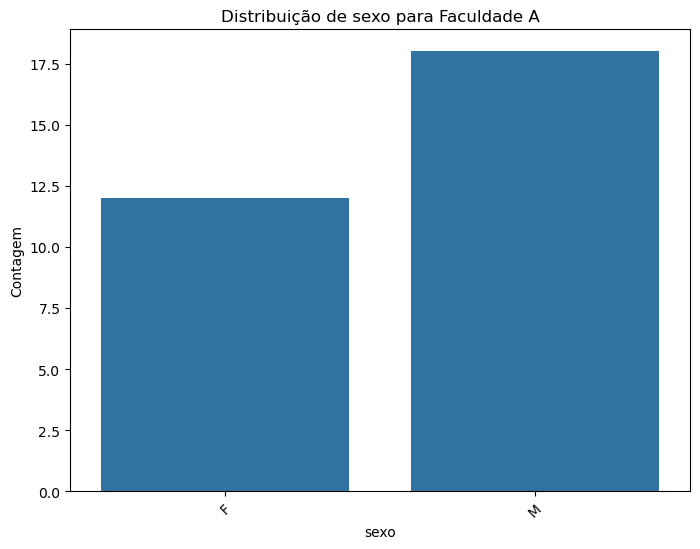

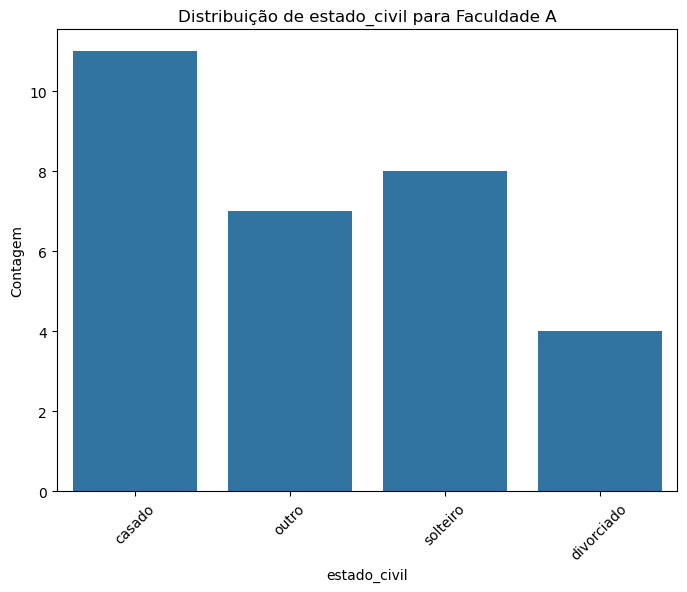

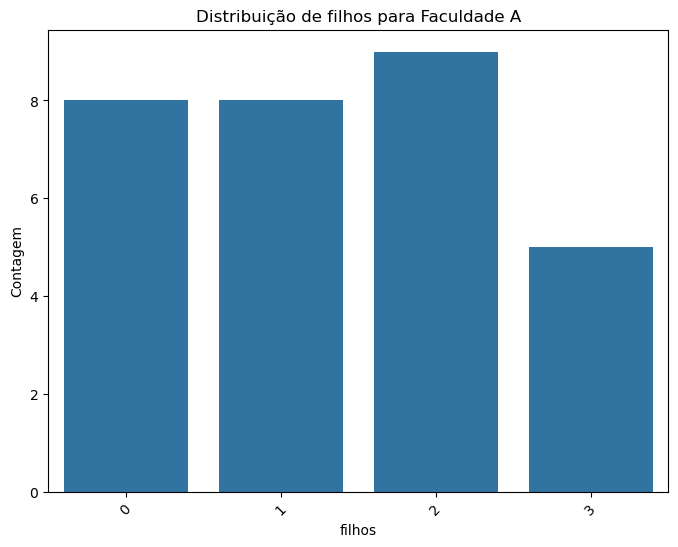

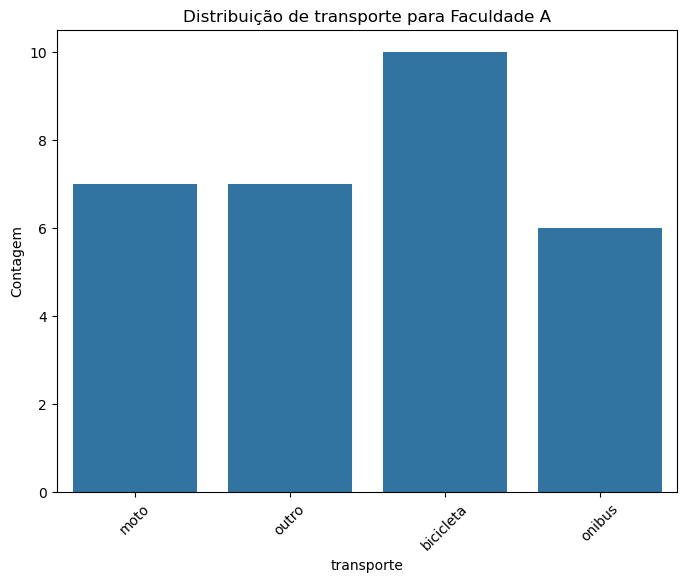

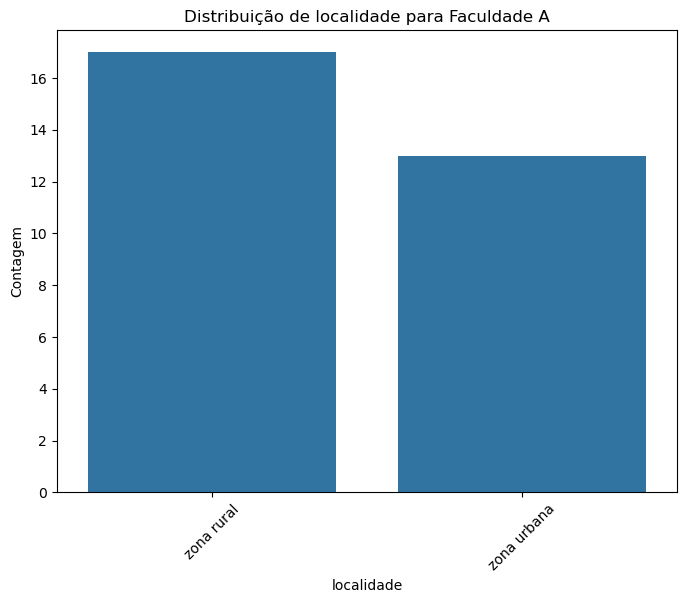


Gráficos de barras para Faculdade C:


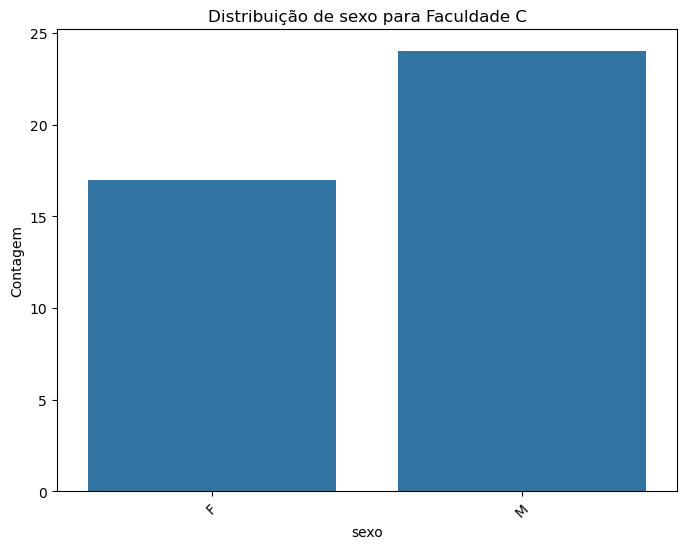

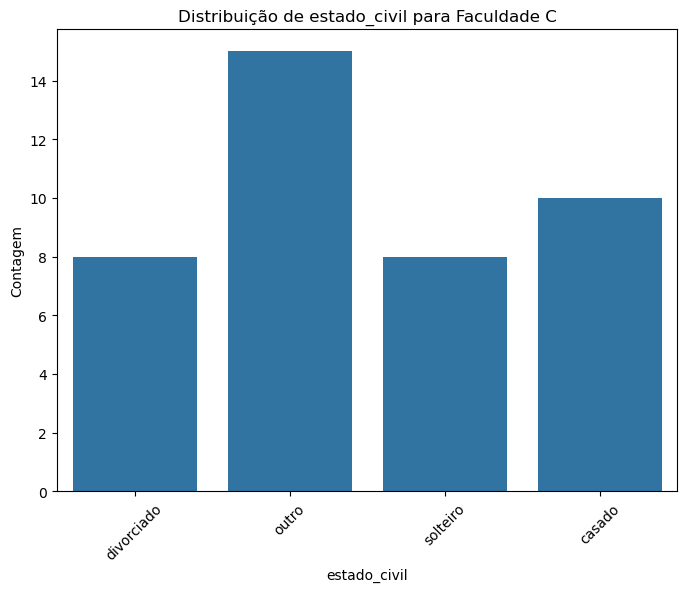

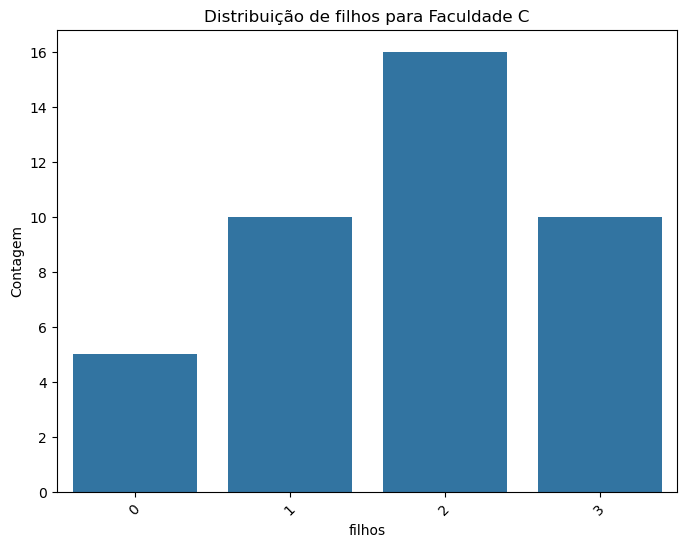

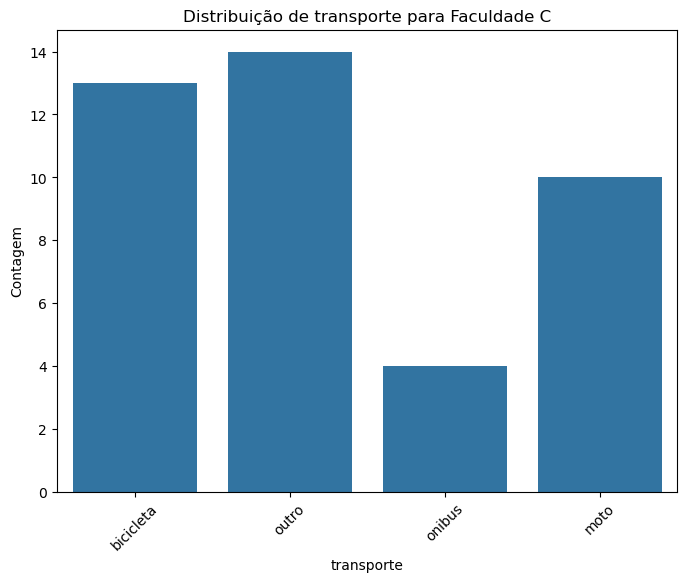

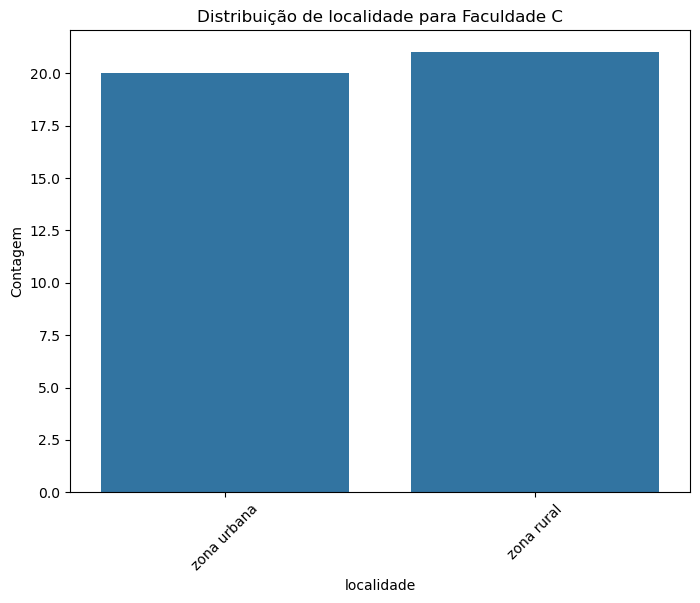


Gráficos de barras para Faculdade B:


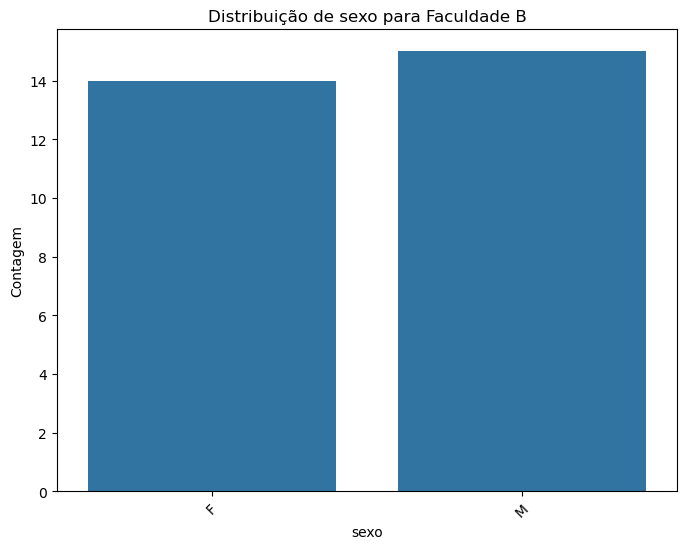

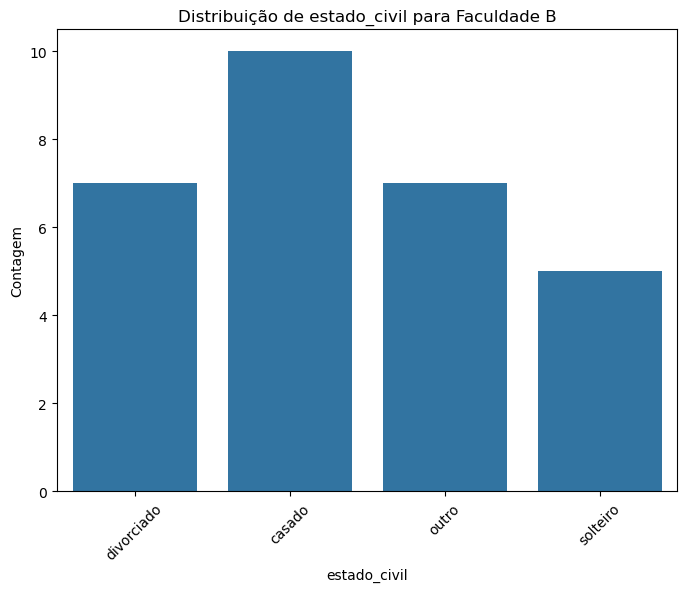

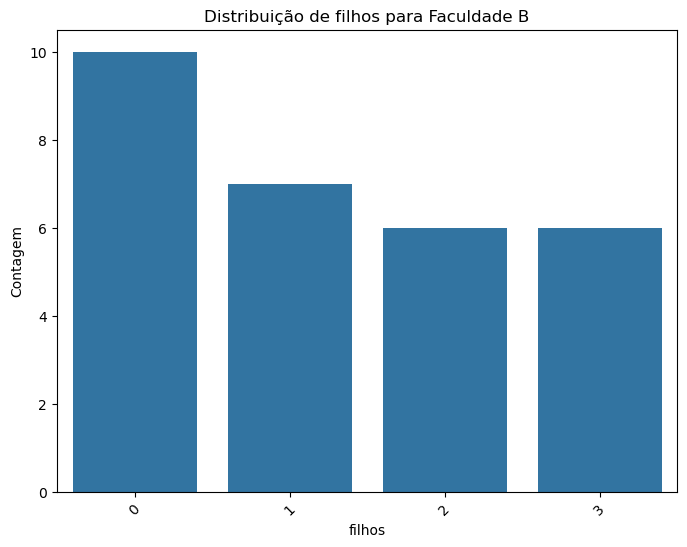

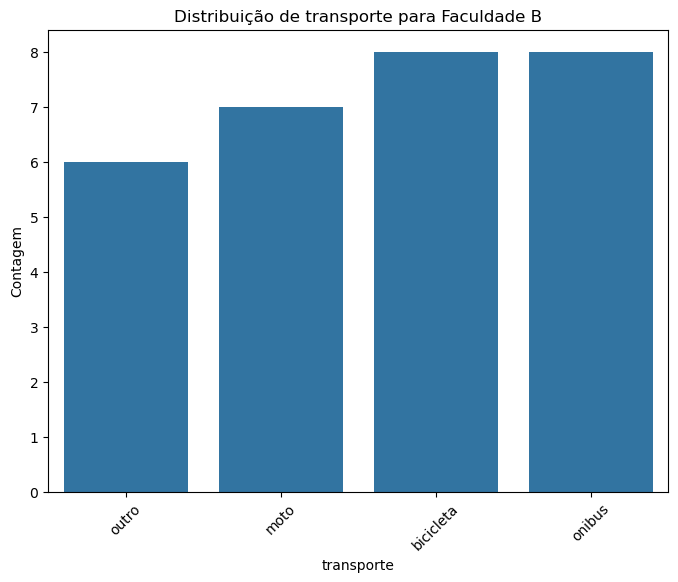

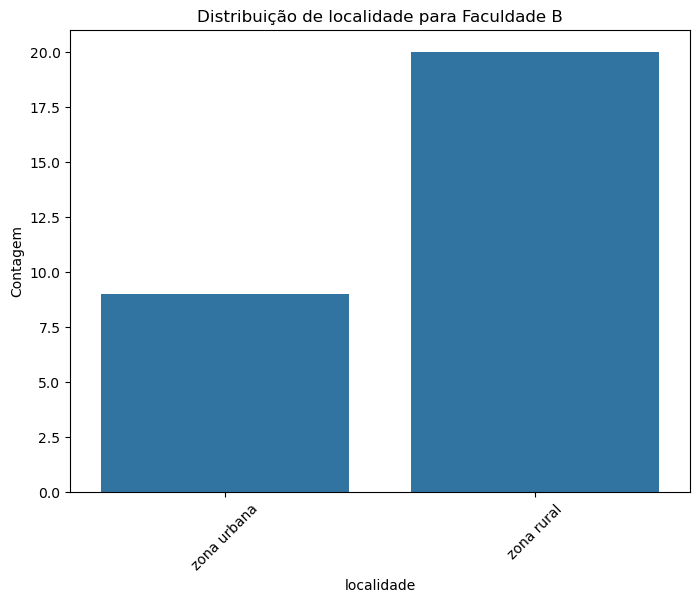

In [167]:
# Gráficos de barras para variáveis qualitativas separado por faculdade
qualitativas = ['sexo', 'estado_civil', 'filhos', 'transporte', 'localidade']

for faculdade in df['faculdade'].unique():
    df_faculdade = df[df['faculdade'] == faculdade]
    print(f"\nGráficos de barras para Faculdade {faculdade}:")

    for var in qualitativas:
        plt.figure(figsize=(8,6))
        sns.countplot(data=df_faculdade, x=var)
        plt.title(f'Distribuição de {var} para Faculdade {faculdade}')
        plt.xlabel(var)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)
        plt.show()


8- Faça os histogramas para as variáveis (idade, altura, peso, exercício, salário) separado
por faculdade (A, B e C)


Histogramas para Faculdade A:


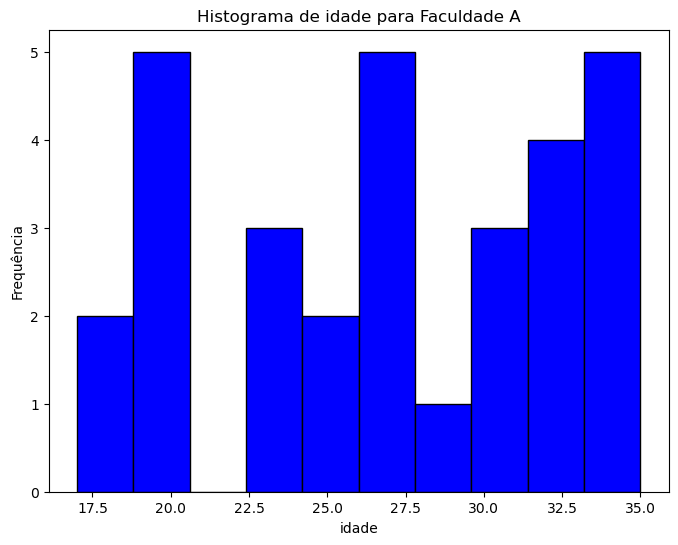

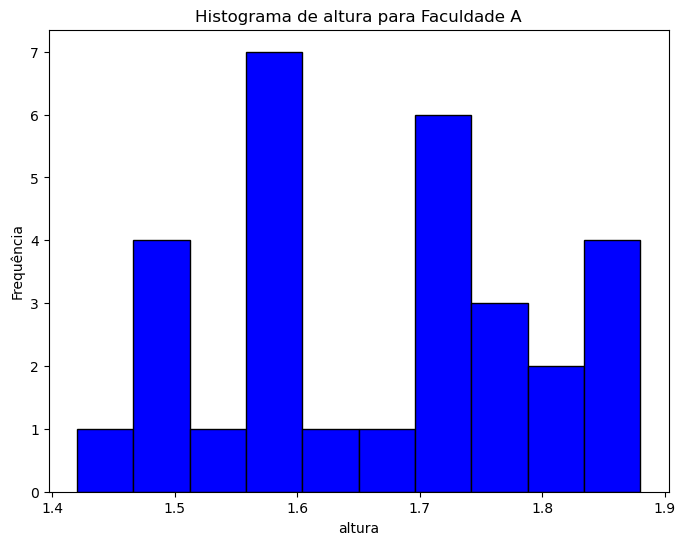

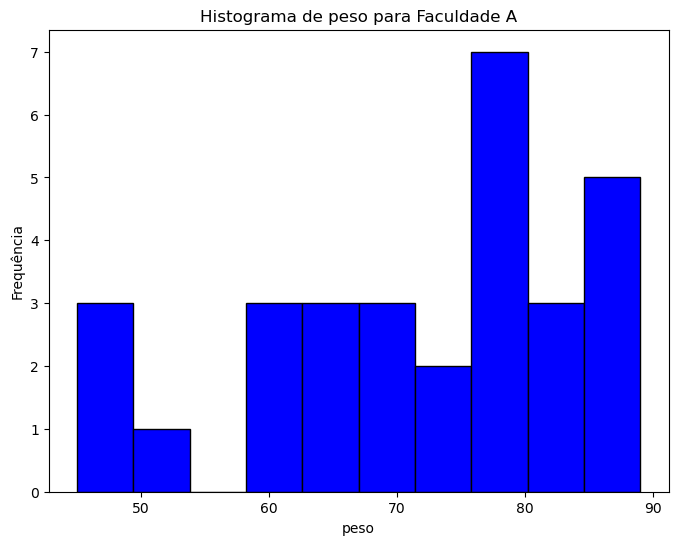

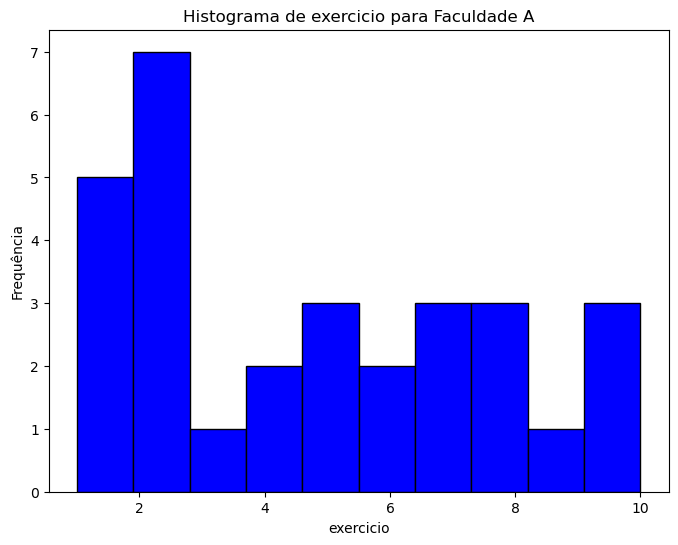

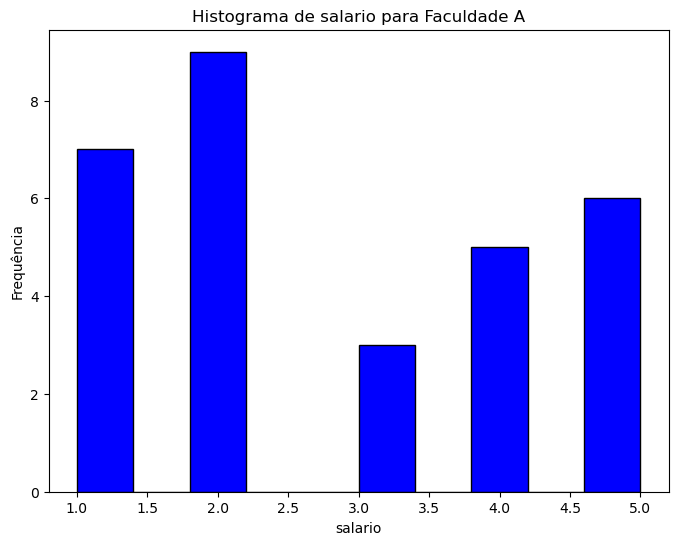


Histogramas para Faculdade C:


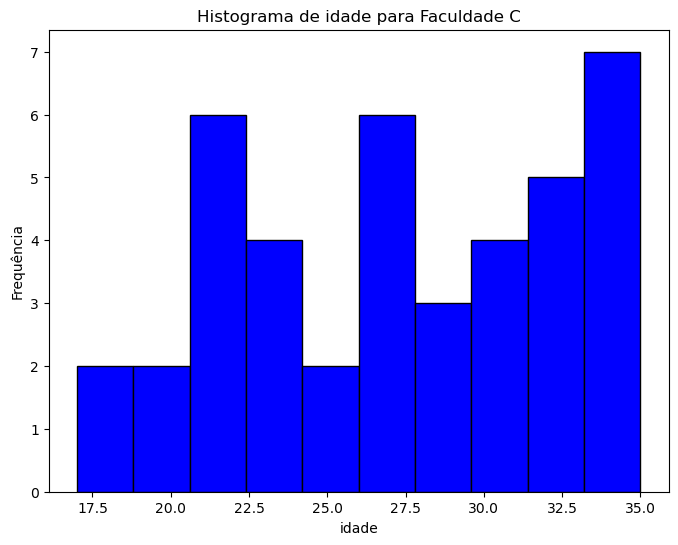

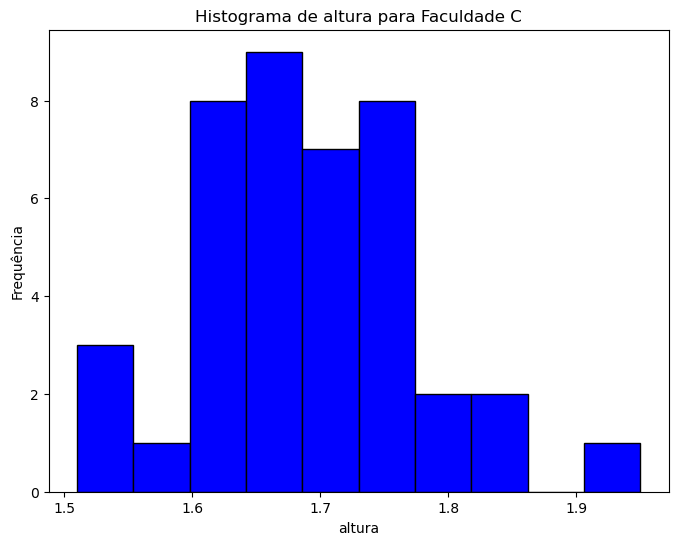

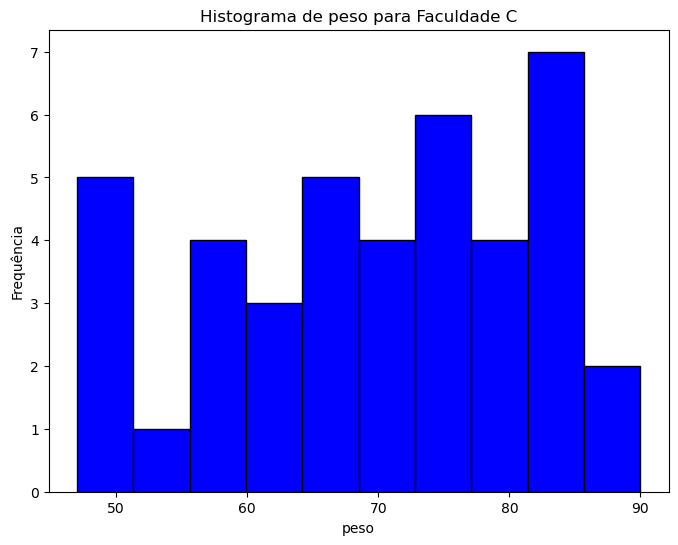

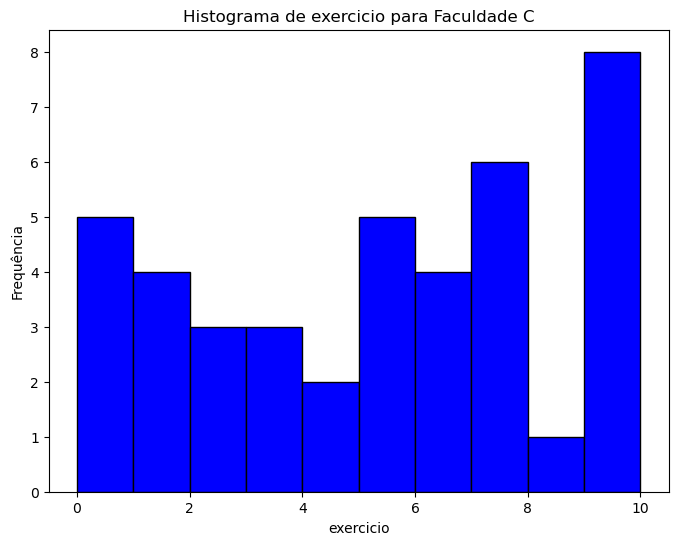

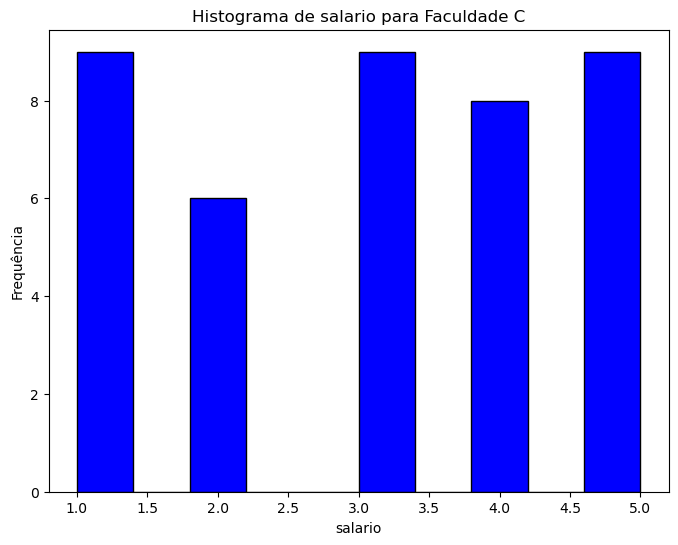


Histogramas para Faculdade B:


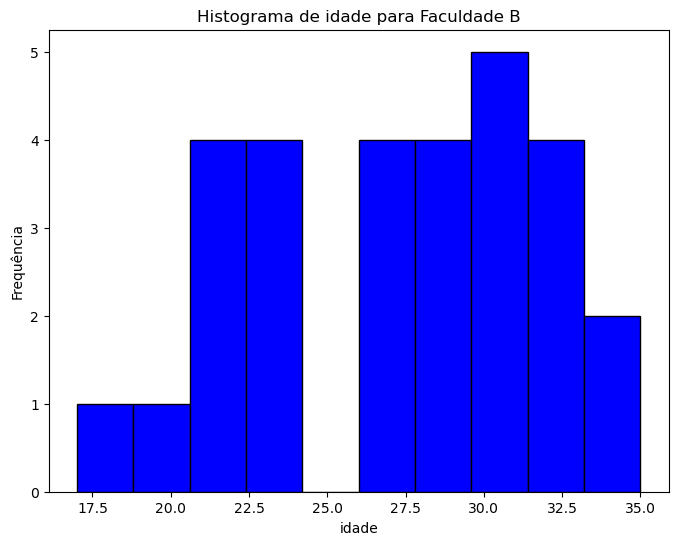

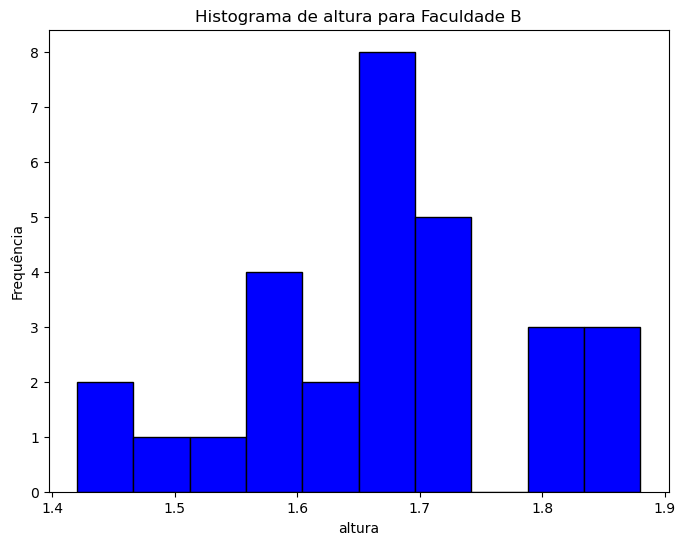

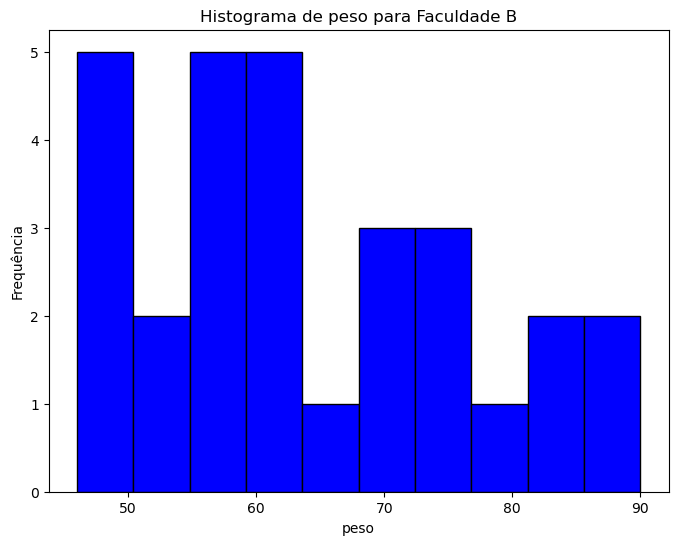

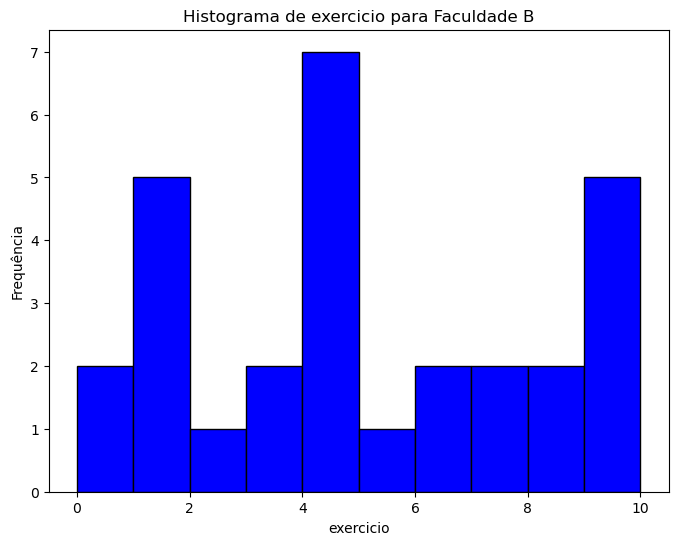

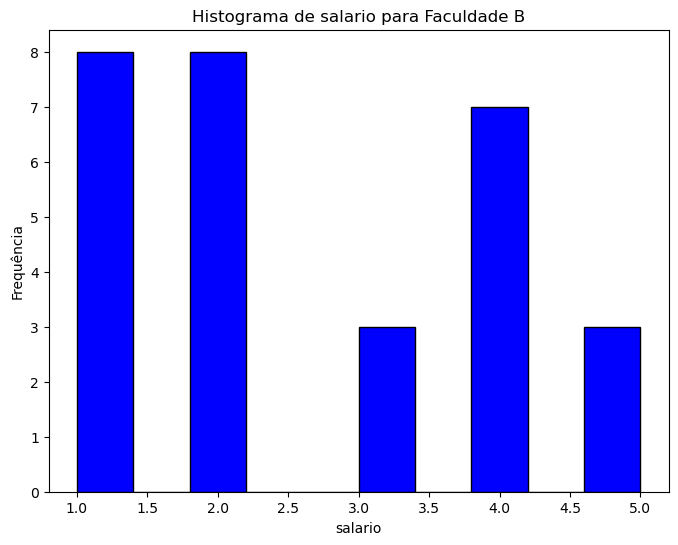

In [182]:
# Histogramas para variáveis quantitativas separado por faculdade
quantitativas = ['idade', 'altura', 'peso', 'exercicio', 'salario']

for faculdade in df['faculdade'].unique():
    df_faculdade = df[df['faculdade'] == faculdade]
    print(f"\nHistogramas para Faculdade {faculdade}:")

    for var in quantitativas:
        # Filtrar valores válidos (não NaN)
        df_var = df_faculdade[var].dropna()
        
        if df_var.empty:
            print(f"Não há dados válidos para {var} na Faculdade {faculdade}")
        else:
            plt.figure(figsize=(8,6))
            plt.hist(df_var, bins=10, color='blue', edgecolor='black')
            plt.title(f'Histograma de {var} para Faculdade {faculdade}')
            plt.xlabel(var)
            plt.ylabel('Frequência')
            plt.show()

9- Faça o gráfico de pontos para as variáveis (peso x idade, peso x altura, peso x exercício)
separado por sexo e separado por faculdade (A, B e C)


Gráficos de dispersão para Faculdade A:


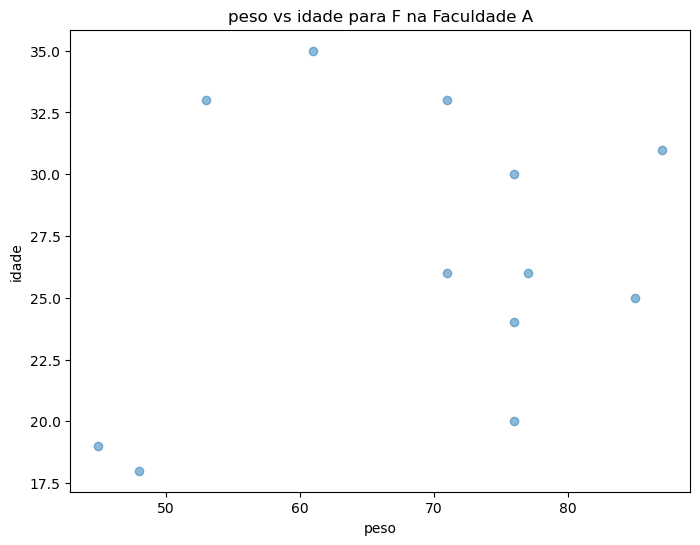

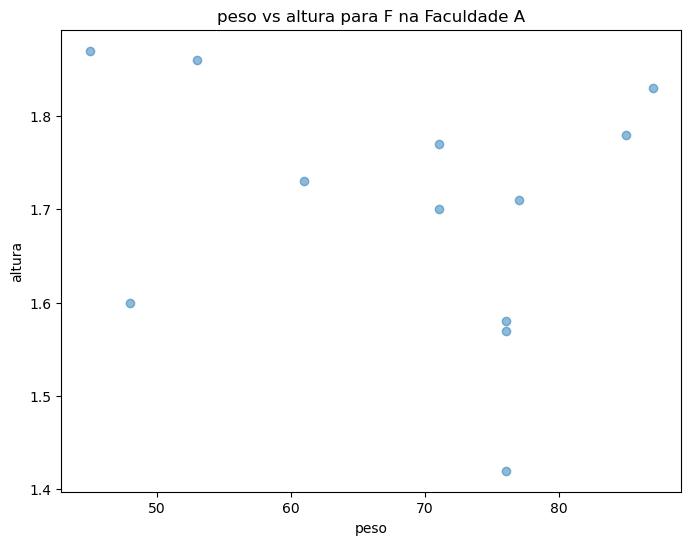

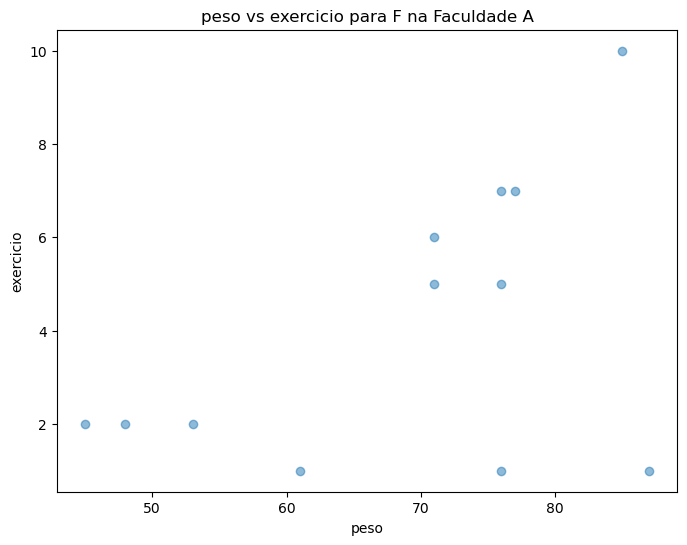

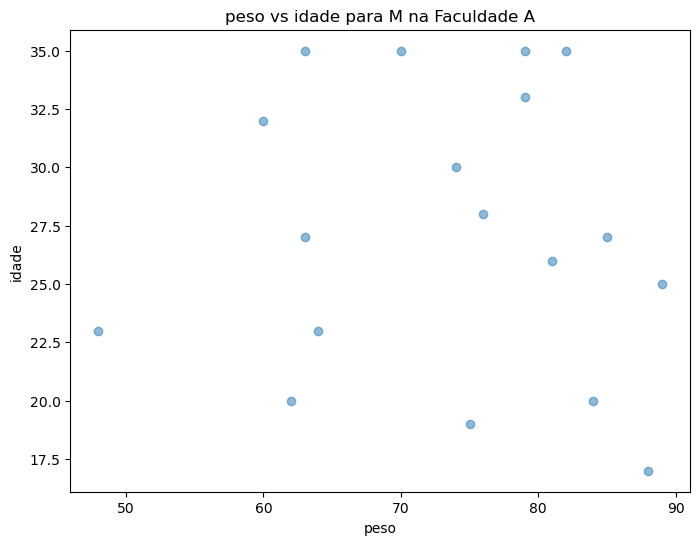

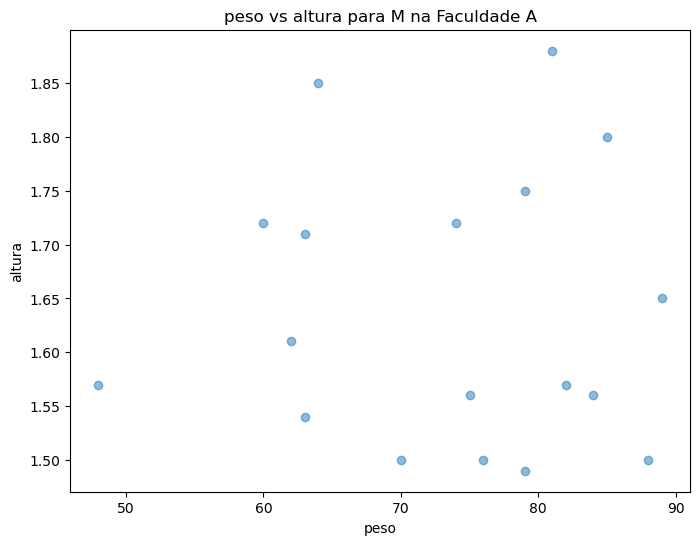

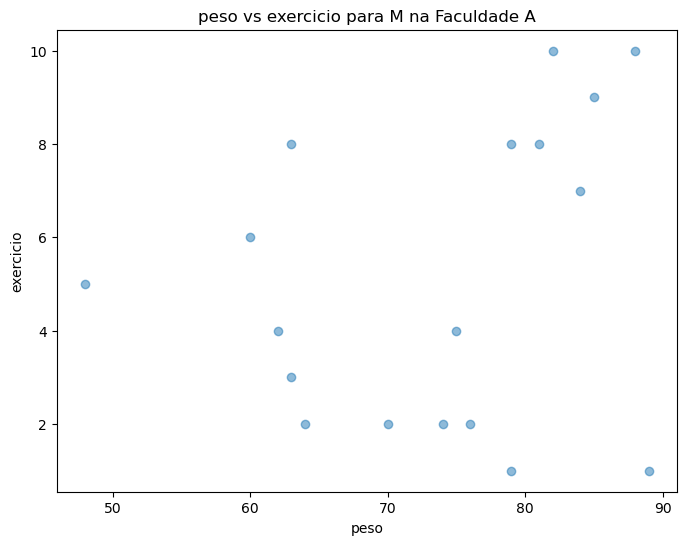


Gráficos de dispersão para Faculdade C:


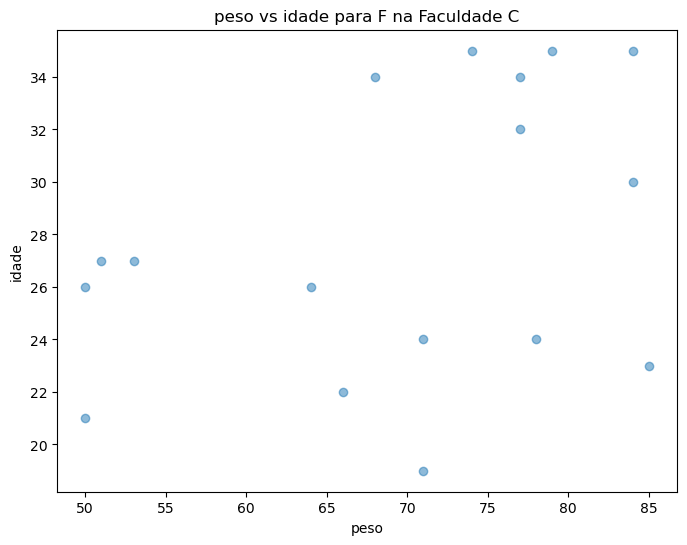

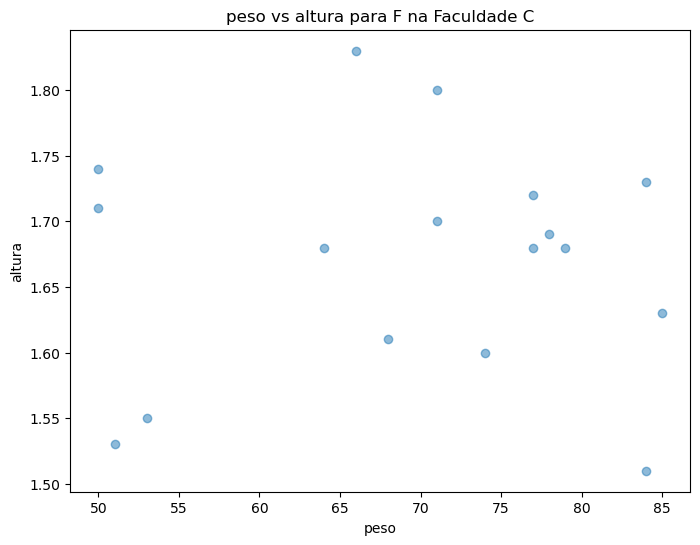

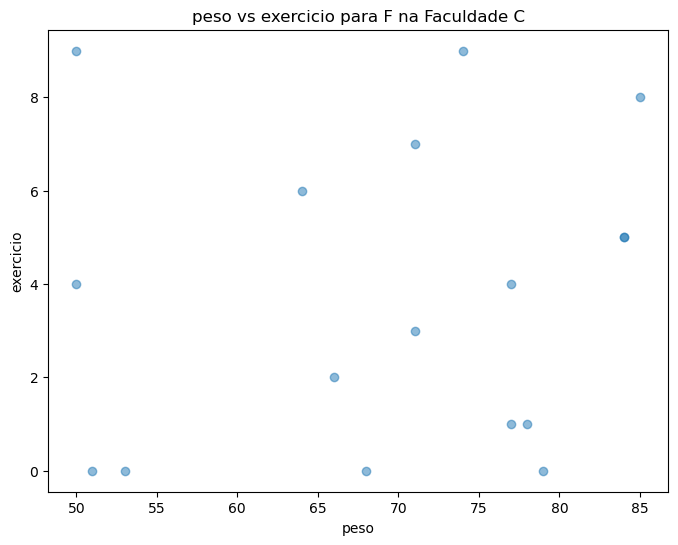

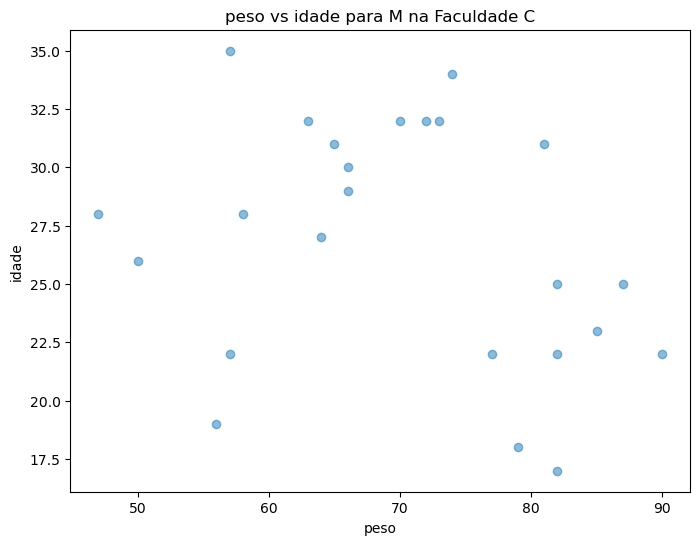

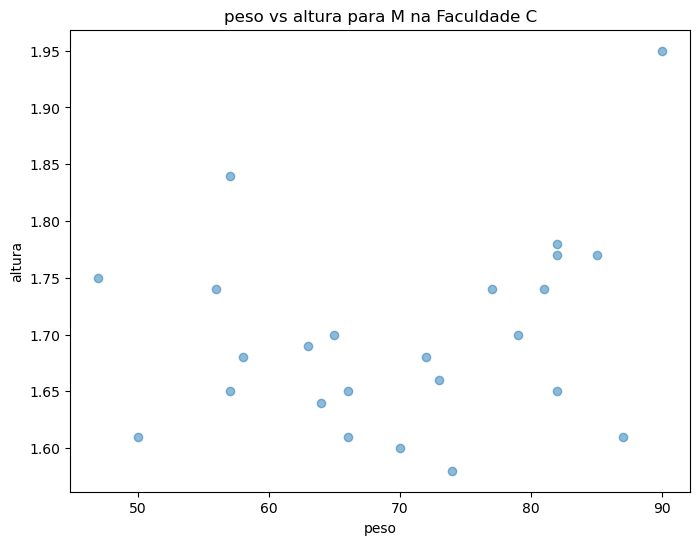

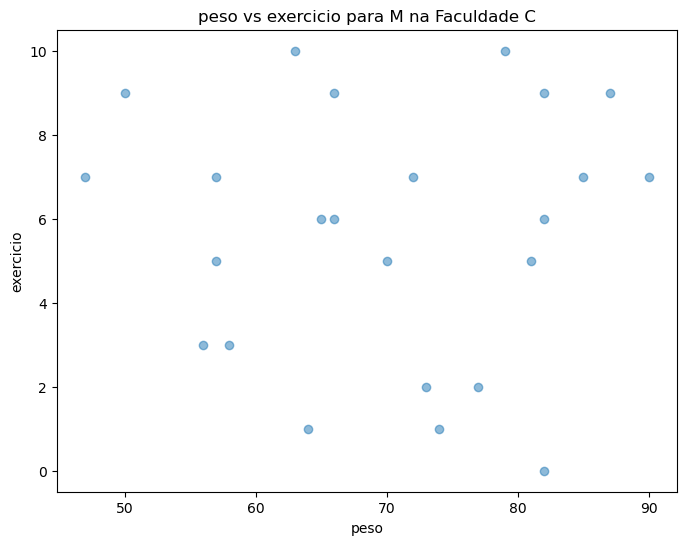


Gráficos de dispersão para Faculdade B:


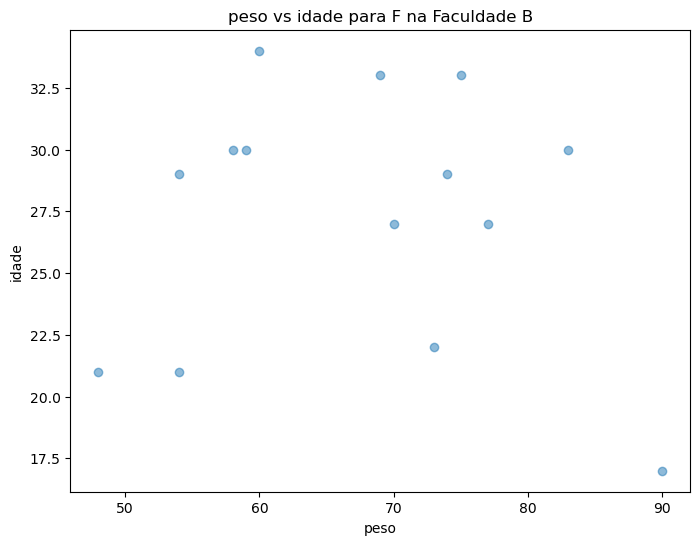

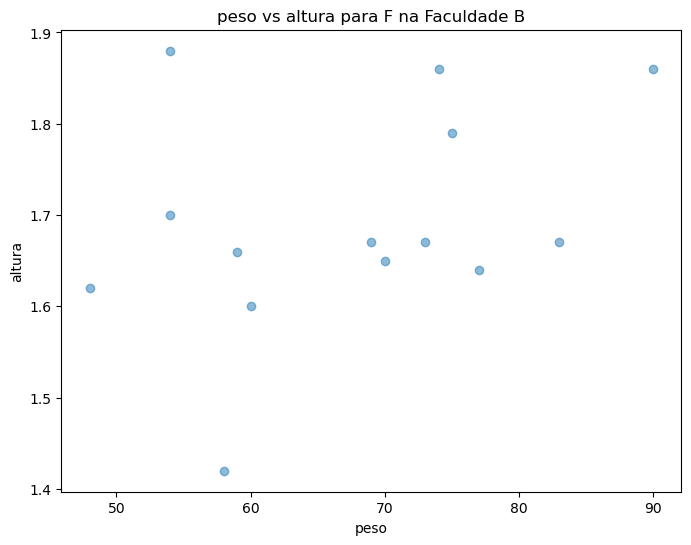

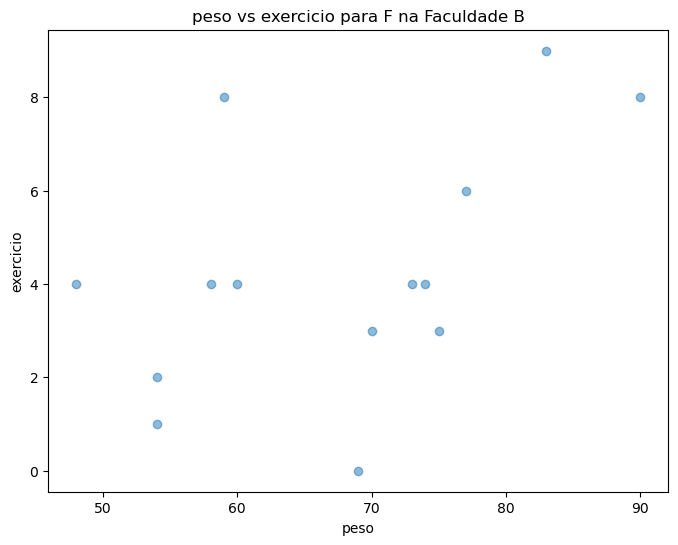

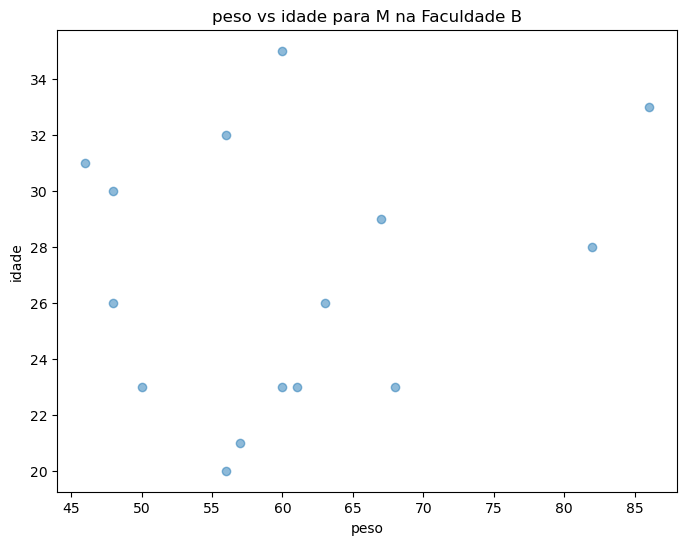

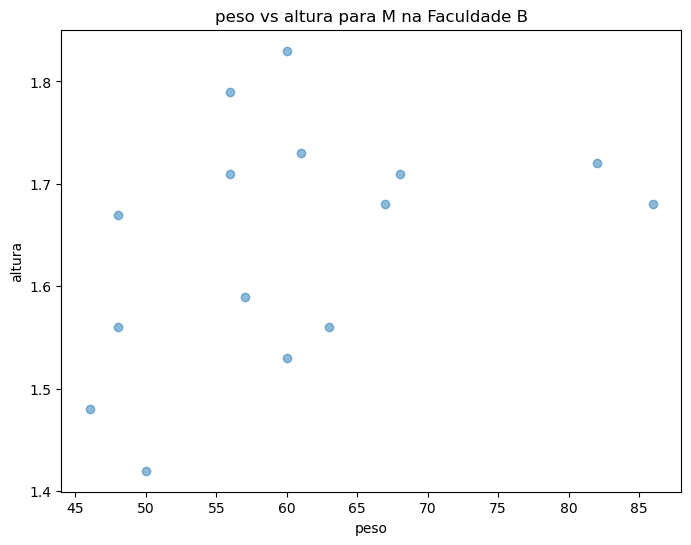

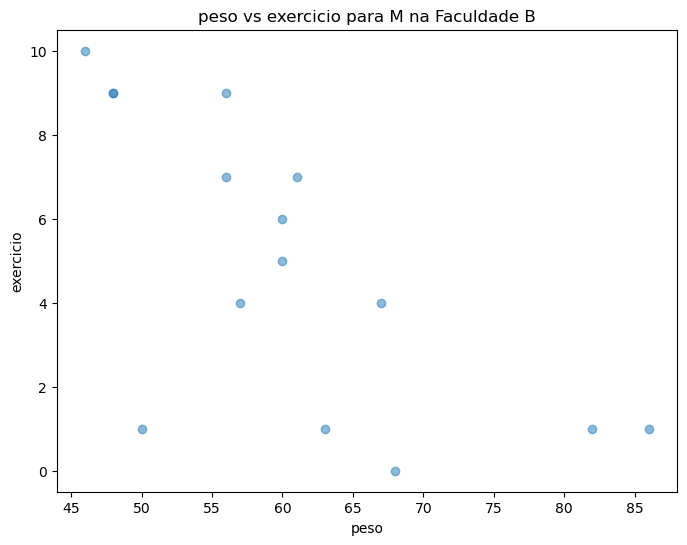

In [172]:
# Gráficos de pontos para variáveis quantitativas separado por sexo e faculdade
combinacoes = [('peso', 'idade'), ('peso', 'altura'), ('peso', 'exercicio')]

for faculdade in df['faculdade'].unique():
    df_faculdade = df[df['faculdade'] == faculdade]
    print(f"\nGráficos de dispersão para Faculdade {faculdade}:")

    for sexo in df['sexo'].unique():
        df_sexo = df_faculdade[df_faculdade['sexo'] == sexo]
        for (x_var, y_var) in combinacoes:
            plt.figure(figsize=(8,6))
            plt.scatter(df_sexo[x_var], df_sexo[y_var], alpha=0.5)
            plt.title(f'{x_var} vs {y_var} para {sexo} na Faculdade {faculdade}')
            plt.xlabel(x_var)
            plt.ylabel(y_var)
            plt.show()


10- Faça os boxplots para as variáveis (idade por sexo, peso por sexo, salário por sexo,
exercício por sexo) separado por faculdade


Boxplots para Faculdade A:


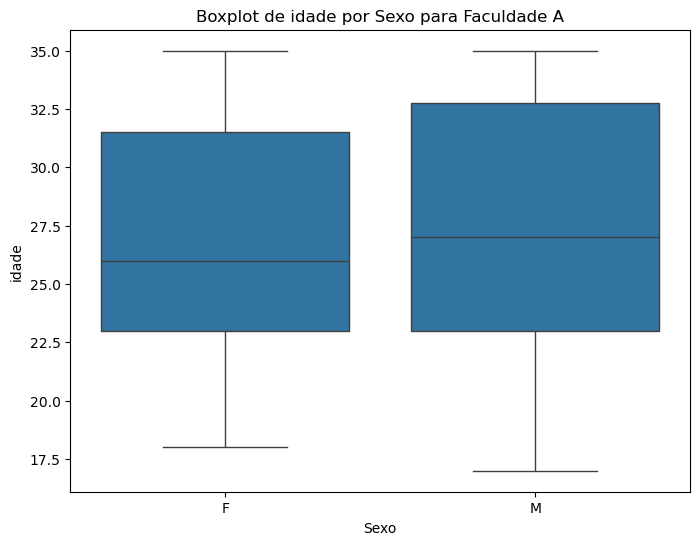

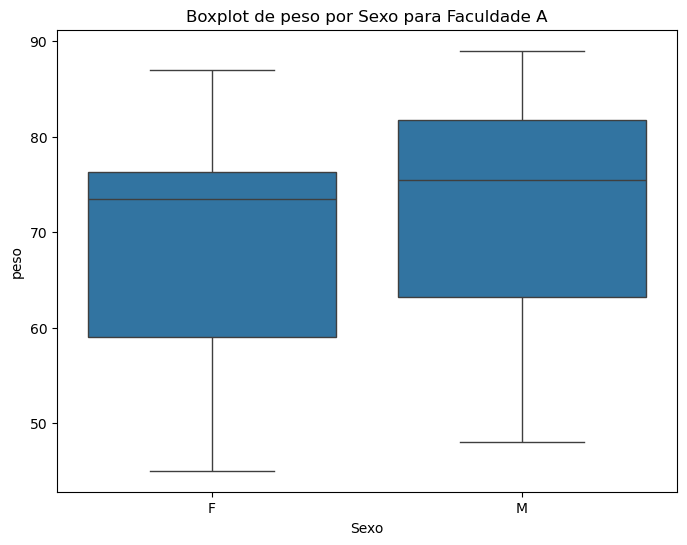

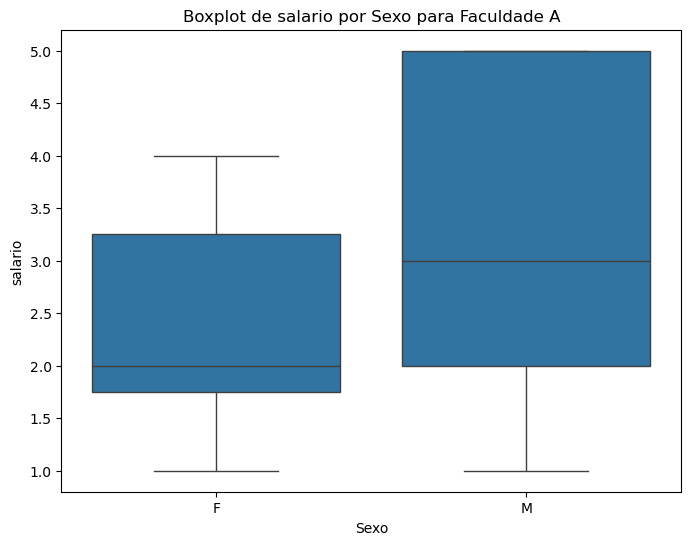

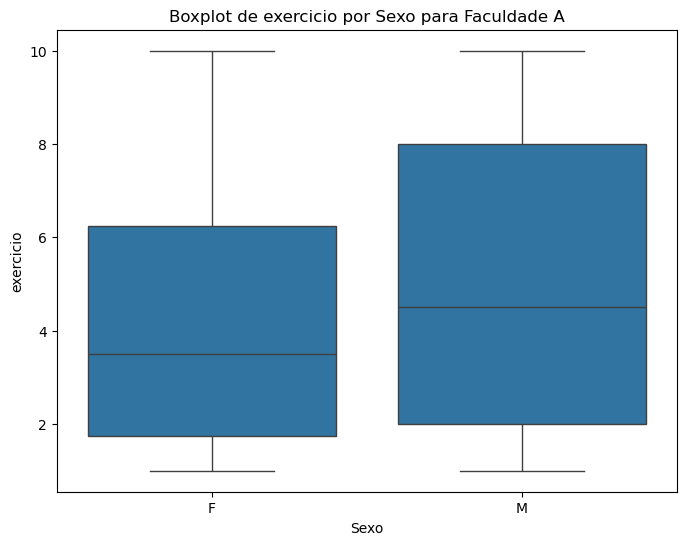


Boxplots para Faculdade C:


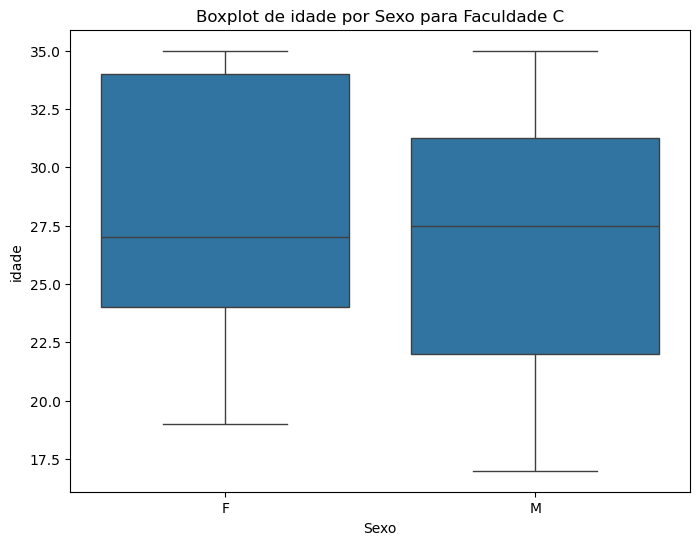

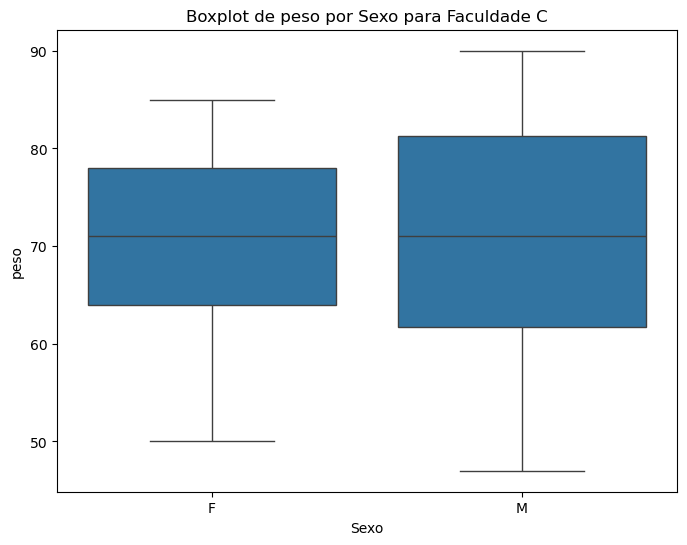

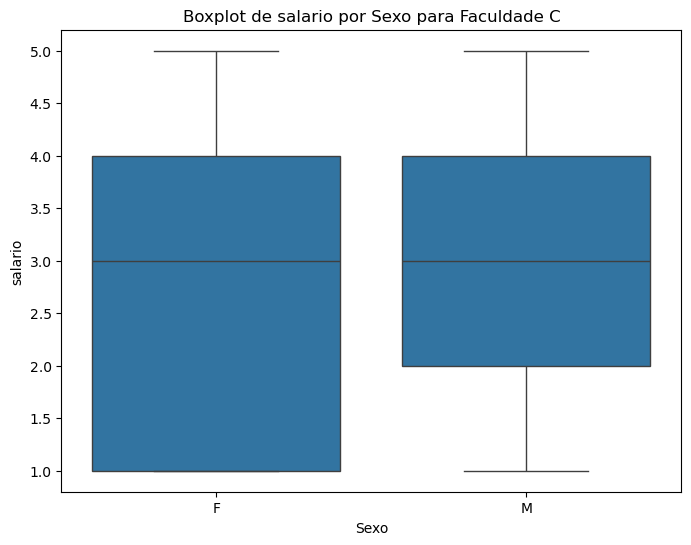

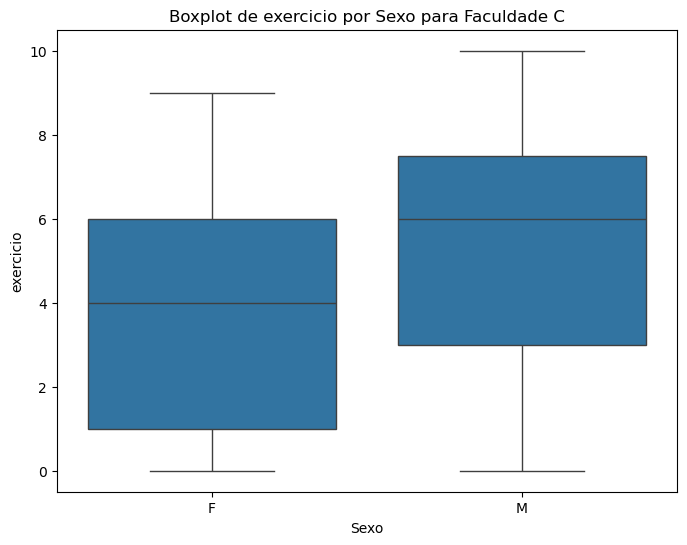


Boxplots para Faculdade B:


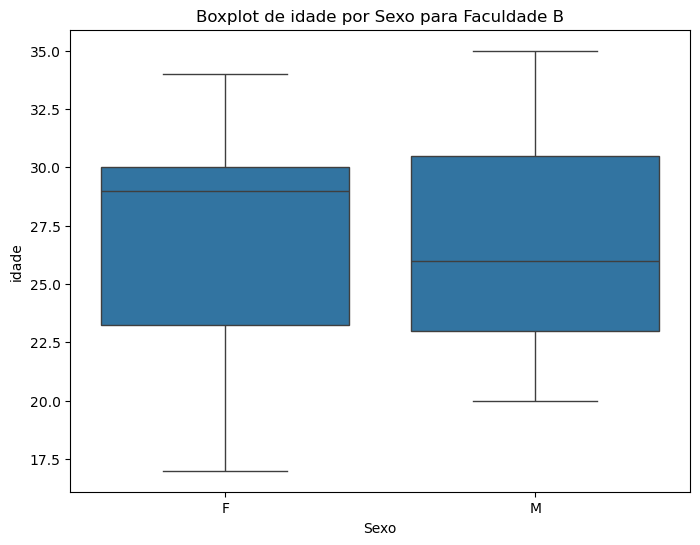

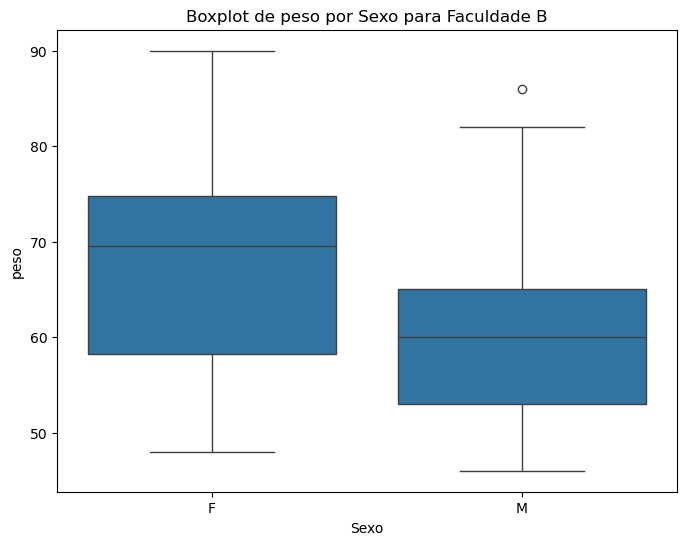

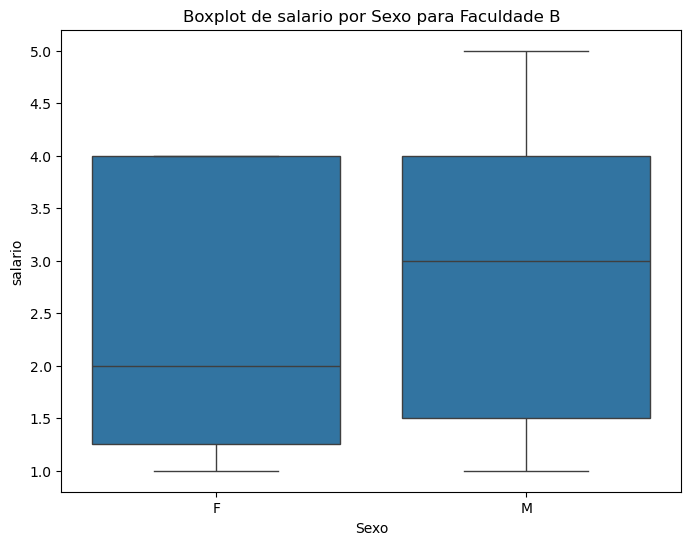

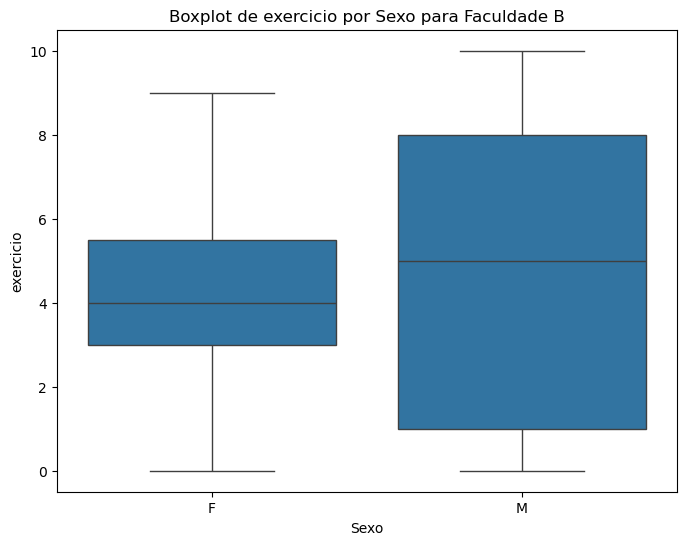

In [174]:
# Boxplots para variáveis quantitativas separado por sexo e faculdade
variaveis_boxplot = ['idade', 'peso', 'salario', 'exercicio']

for faculdade in df['faculdade'].unique():
    df_faculdade = df[df['faculdade'] == faculdade]
    print(f"\nBoxplots para Faculdade {faculdade}:")

    for var in variaveis_boxplot:
        plt.figure(figsize=(8,6))
        sns.boxplot(data=df_faculdade, x='sexo', y=var)
        plt.title(f'Boxplot de {var} por Sexo para Faculdade {faculdade}')
        plt.xlabel('Sexo')
        plt.ylabel(var)
        plt.show()


11- Faça o mapa de calor para matriz de correlação entre as variáveis (peso, altura, idade e
exercício) separado por sexo e separado por faculdade (A, B e C)


Mapa de calor para Faculdade A:


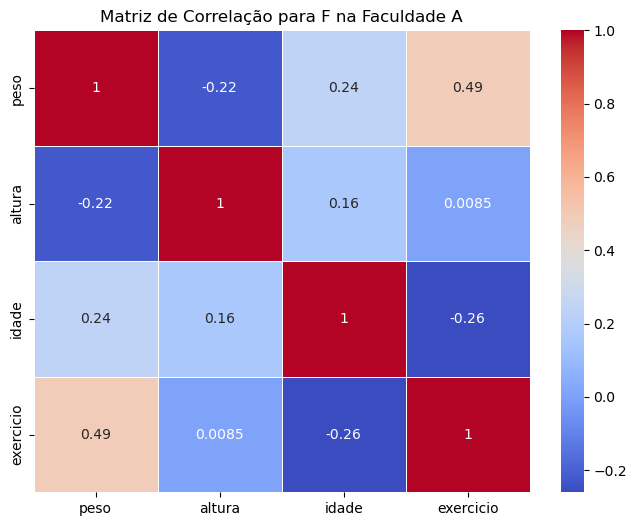

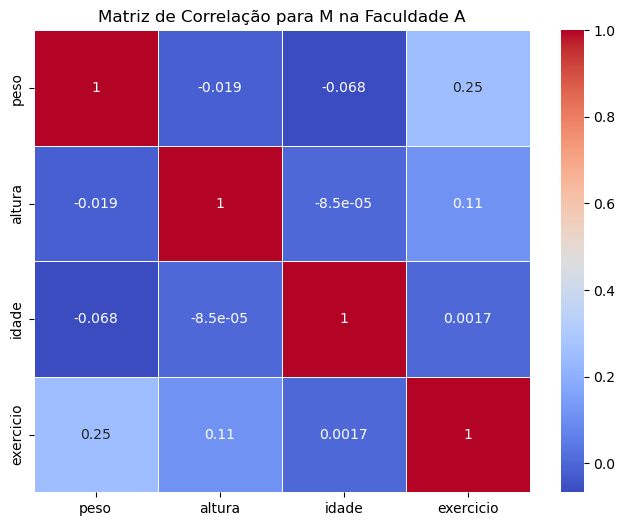


Mapa de calor para Faculdade C:


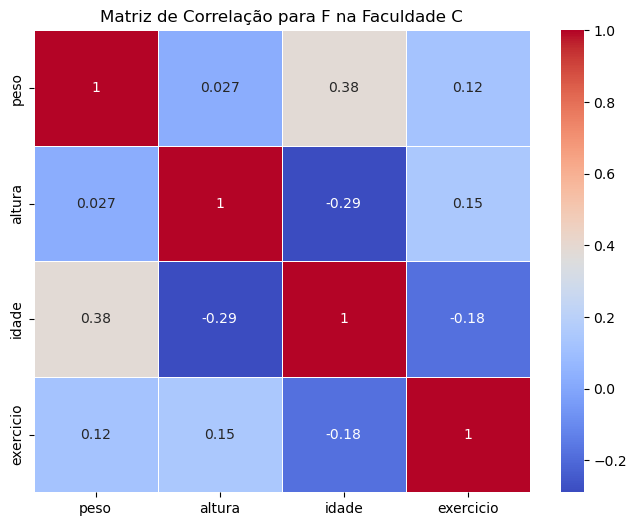

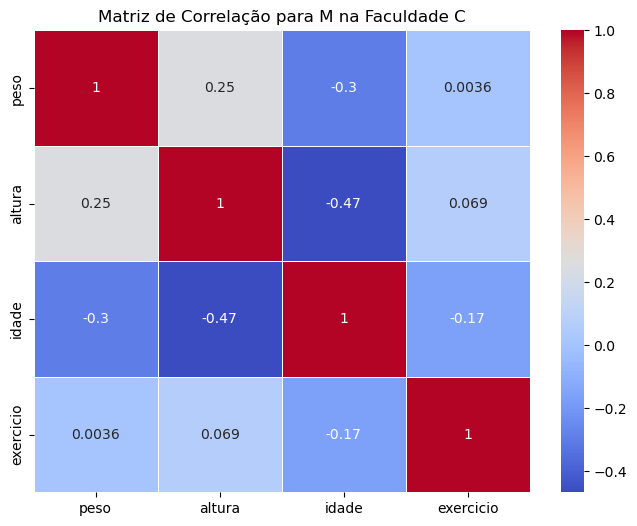


Mapa de calor para Faculdade B:


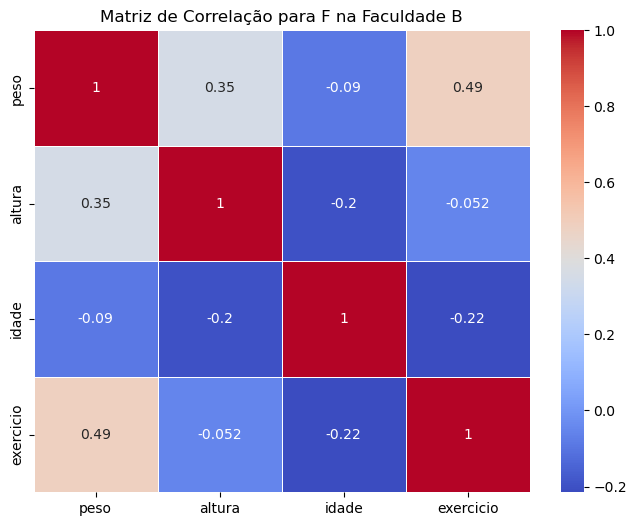

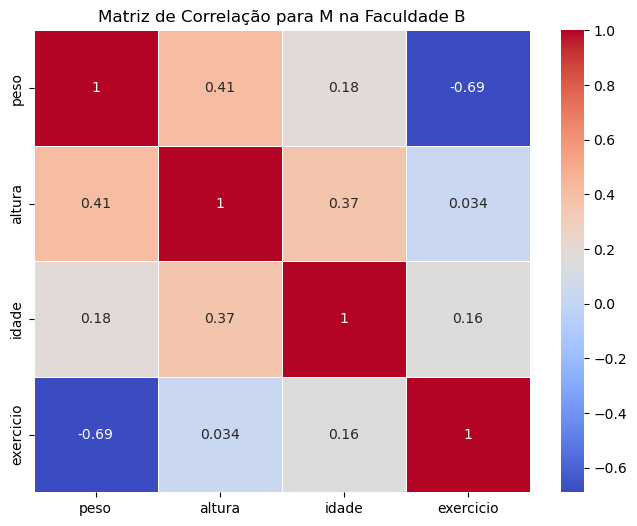

In [177]:
# Mapa de calor da matriz de correlação para peso, altura, idade e exercício separado por sexo e faculdade
variaveis_correlacao = ['peso', 'altura', 'idade', 'exercicio']

for faculdade in df['faculdade'].unique():
    df_faculdade = df[df['faculdade'] == faculdade]
    print(f"\nMapa de calor para Faculdade {faculdade}:")

    for sexo in df['sexo'].unique():
        df_sexo = df_faculdade[df_faculdade['sexo'] == sexo]
        
        # Calcular a matriz de correlação
        correlacao = df_sexo[variaveis_correlacao].corr()

        # Exibir o mapa de calor
        plt.figure(figsize=(8,6))
        sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title(f'Matriz de Correlação para {sexo} na Faculdade {faculdade}')
        plt.show()
